In [8]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pylops

In [20]:

im = np.load('sun.npy')[::5, ::5, 0]

Nz, Nx = im.shape

nh = [15, 25]
hz = np.exp(-0.1*np.linspace(-(nh[0]//2), nh[0]//2, nh[0])**2)
hx = np.exp(-0.03*np.linspace(-(nh[1]//2), nh[1]//2, nh[1])**2)
hz /= np.trapz(hz) # normalize the integral to 1
hx /= np.trapz(hx) # normalize the integral to 1
h = hz[:, np.newaxis] * hx[np.newaxis, :]


Cop = pylops.signalprocessing.Convolve2D(Nz * Nx, h=h,
                                         offset=(nh[0] // 2,
                                                 nh[1] // 2),
                                         dims=(Nz, Nx), dtype='float32')

In [21]:
imblur = Cop * im.flatten()

imdeblur = \
    pylops.optimization.leastsquares.NormalEquationsInversion(Cop, None,
                                                              imblur,
                                                              maxiter=50)


imblur = imblur.reshape((Nz, Nx))
imdeblur = imdeblur.reshape((Nz, Nx))


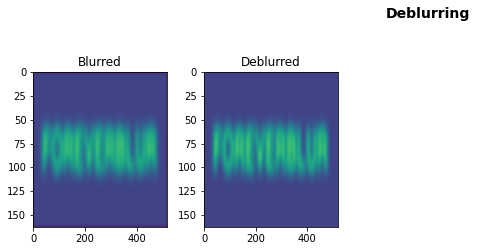

In [19]:

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Deblurring', fontsize=14, fontweight='bold', y=0.95)

ax1 = plt.subplot2grid((2, 5), (0, 0))
ax2 = plt.subplot2grid((2, 5), (0, 1))


ax1.imshow(imblur, cmap='viridis', vmin=0, vmax=250)
ax1.axis('tight')
ax1.set_title('Blurred')
ax2.imshow(imdeblur, cmap='viridis', vmin=0, vmax=250)
ax2.axis('tight')
ax2.set_title('Deblurred')

plt.tight_layout()
plt.subplots_adjust(top=0.8)